







































































































































































## PRiAD 1

# Przetwarzanie danych w języku Python


# 1. Serie i ramki danych

Pakiety `NumPy` i `Pandas` są kluczowymi pakietami wykorzystywanymi w analizie danych. Pakiety `NumPy` oznacza **numerical Python** i posiada struktury pozwalające na składowanie danych zapewniający szybki dostęp do nich oraz zoptymalizowane pod kątem obliczeniowym podstawowe operacje matematyczne. Natomiast podstawową funkcją pakietu `Pandas` jest nadbudowa struktur `NumPy` dostarczająca użytkownikowi wygody w przechowywaniu danych i ich późniejszej eksploracji. W szczególności pakiet `Pandas` oferuje struktury danych **series** i **data frame**, służące do przechowywania i dostępu do odpowiednio serii i macierzy danych. Ramki danych to inna nazwa dwuwymiarowych macierzy danych, w których kolumny są atrybutami (cechami, zmiennymi), zaś wiersze to obiekty (instancje, przykłady uczące). Seria danych w terminologii pakietu `pandas` to macierz danych o dokładnie jednej kolumnie. 

Wykorzystanie tych pakietów wymaga ich importu w każdej nowej sesji:

In [1]:
import numpy as np
import pandas as pd

## 1.1 Seria danych

Typ danych **series** służy do pojedynczych przechowywania serii (szeregu) danych. Zmienną tego typu tworzymy z wykorzystaniem metody `series`, której argument zwiera informację o danych tworzących dany szereg. Informacja ta może być umieszczona w liście zawierającej kolejne wartości.

In [2]:
"""import pandas as pd
import numpy as np
s = pd.Series([1, 3, 5, np.nan, 6, 8, "Privet"])
print(type(s))
s
"""
import pandas as pd
import numpy as np
"""
s = pd.Series([{"loch": 10,
                   "goida" : 20,
                   "Putin" : 30},
                  10,
                  20,
                  np.nan]
                 )
"""
s = pd.Series([10, 20
])
print(s)


0    10
1    20
dtype: int64


In [3]:
s2 = pd.Series(np.linspace(1, 100, 10))  
print(s2)  

#  np.linspace(start, stop, num) == стартовое число, конечное число, количество чисел которые будут забиты в серию. Старт и стоп включены
s2_2 = pd.Series(np.linspace(1, 10, 5))
try:
    print(s2_2)
except Exception as e:
    print("Exception: " + str(e))

0      1.0
1     12.0
2     23.0
3     34.0
4     45.0
5     56.0
6     67.0
7     78.0
8     89.0
9    100.0
dtype: float64
0     1.00
1     3.25
2     5.50
3     7.75
4    10.00
dtype: float64


In [4]:
s3 = pd.Series(np.random.randn(20))  
print(s3)  

# np.random.randn(n) = Создаёт массив из n случайных чисел по нормальному распределению
s3_1 = pd.Series(np.random.rand(20))
print(s3_1)

0     0.842099
1    -0.773342
2    -0.009108
3    -0.083072
4    -1.136027
5     1.078616
6     0.504833
7     0.665620
8     1.006342
9    -0.285540
10   -0.590873
11    0.505225
12    0.338028
13    1.179585
14   -1.210103
15   -0.856496
16    0.350954
17    0.270194
18    1.280458
19    0.924951
dtype: float64
0     0.109091
1     0.443552
2     0.557226
3     0.723685
4     0.165943
5     0.842108
6     0.979877
7     0.589939
8     0.247921
9     0.690443
10    0.651678
11    0.030277
12    0.605356
13    0.561719
14    0.064829
15    0.477784
16    0.157935
17    0.607148
18    0.782758
19    0.512182
dtype: float64


Liczbę elementów serii otrzymujemy przy pomocy metody `count()`.

In [5]:
print(s3.count())
# count() для серий возвращает количество не-NaN элементов, но не длину вообще!!!
print(s3_1.count())

20
20


Pierwsze i ostatnie elementy serii danych można otrzymać używając metod, odpowiednio, `head()` oraz `tail()`. Opcjonalny argument definiuje liczbę pierwszych/ostatnich elementów. 

In [6]:
s3.head(10)
# .head(n) показывает n количество строк в начале серии, по умолчанию пять

0    0.842099
1   -0.773342
2   -0.009108
3   -0.083072
4   -1.136027
5    1.078616
6    0.504833
7    0.665620
8    1.006342
9   -0.285540
dtype: float64

In [7]:
s3.tail(3)
# .tail(n) показывает n количество строк в конце серии, по умолчанию пять. Именно пять последних, а не с конца пятью
s3.tail()

15   -0.856496
16    0.350954
17    0.270194
18    1.280458
19    0.924951
dtype: float64

Metoda `sort_values` umożliwia sortowanie elementów serii danych. Zwróć uwage na sposób wywołania tej metody w poniższym przykładzie wraz z metodą `head()`. Jaki jest efekt takiego wywołania ?

In [8]:

"""
Этот код сортирует строку s3 по возрастанию, при этом СОХРАНЯЯ индексы(индекс привязан к значению). 
Потом мы берём последние 10 элементов посортированного массива
"""
s3.sort_values().tail(10)

16    0.350954
6     0.504833
11    0.505225
7     0.665620
0     0.842099
19    0.924951
8     1.006342
5     1.078616
13    1.179585
18    1.280458
dtype: float64

## 1.2 Ramka danych

Drugą podstawową strukturą danych pakietu `pandas` jest macierz danych nazywana **ramką danych**. Metodą umożliwiającą tworzenie ramki danych jest metoda `DataFrame`, której argumenty decydują o formie tworzonej ramki. 

In [9]:
np.random.randn(6, 4)

array([[-1.37993138, -1.00739502,  2.2951998 , -0.21416925],
       [-0.42815695, -2.38927343, -1.01414148, -0.85850928],
       [ 0.02281887, -0.44317437,  0.42325789, -0.24169235],
       [-1.48542731,  0.84170777,  0.85560639,  0.18750435],
       [ 0.29953548, -1.73279133, -0.95716618,  0.00898585],
       [-2.40812662,  1.22293314, -0.59691729, -1.66445088]])












































































































































 
 
 
 
 
 
 
 
 
 
 
 
 
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 




























W tak utworzonej ramce odwołania do poszczególnych jej elementów można realizować jedynie poprzez indeksy. Możliwe jest jednak dodatkowe opisanie wierszy (obiektów) oraz kolumn (atrybutów) dowolnymi etykietami. Nadanie etykiet atrybutom umożliwia argument `columns`. 

In [10]:
list('ABCD')

['A', 'B', 'C', 'D']

In [11]:
#DataFrame(данные, колонны, строки) строки и колонны указываются явно

df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.448128,-0.065875,0.662212,-0.112132
1,-1.382269,-0.129237,-0.352872,0.806823
2,0.442832,1.581937,-0.658653,-2.065460
3,-0.127121,0.858659,-0.770001,0.063134
4,1.195121,-0.456826,0.178534,-2.372921
5,-0.104539,1.523948,2.112474,-0.037907


Ramka `df` zawiera 6 obiektów (wiersze) opisanych 4 atrybutami (kolumny), etykietami obiektów są kolejne liczby całkowite, zaś etykietami atrybutów są kolejne wielkie litery.

Także wiersze (obiekty) mogą zostać nazwane poprzez nadanie im etykiet.

In [12]:
df1 = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'), index = list('abcdef'))
df1

,A,B,C,D
a,0.628406,1.827637,-0.240876,-0.075341
b,-0.454999,0.037061,0.497282,0.122522
c,2.078194,-0.606066,0.335078,0.587100
d,0.595287,-1.995207,0.120783,0.587749
e,0.799791,1.940792,0.172610,-0.202011
f,0.368999,1.169343,0.190200,-0.392670


Macierz danych składa się z obiektów opisanych atrybutami. Kolejne atrybuty stanowią argumenty funkcji `DataFrame`.

In [13]:
df2 = pd.DataFrame({'A': 1.,
   ...:             'B': pd.Timestamp('20201102'),
   ...:             'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:             'D': np.array([3] * 4, dtype='int32'),
   ...:             'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:             'F': 'cokolwiek'})
print(df2)

df_my = pd.DataFrame([{0,1,2,3},
                      {0,1,2,3},
                      {0,1,2,3},
                      {0,1,2,3}
                     ],
                     columns = list('ABCD'),
                     index = list('abcd')
                    )
print(df_my)

     A          B    C  D      E          F
0  1.0 2020-11-02  1.0  3   test  cokolwiek
1  1.0 2020-11-02  1.0  3  train  cokolwiek
2  1.0 2020-11-02  1.0  3   test  cokolwiek
3  1.0 2020-11-02  1.0  3  train  cokolwiek
   A  B  C  D
a  0  1  2  3
b  0  1  2  3
c  0  1  2  3
d  0  1  2  3


Ramka danych jest obiektem klasy `DataFrame`. Szereg metod tej klasy udostępnia zarówno dane jak i własności ramki. Metoda `info` zwraca podstawowe informacje o ramce danych. 

In [14]:
df.info()
df_my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 324.0 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
 3   D       4 non-null      int64
dtypes: int64(4)
memory usage: 160.0+ bytes


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       4 non-null      float64      
 1   B       4 non-null      datetime64[s]
 2   C       4 non-null      float32      
 3   D       4 non-null      int32        
 4   E       4 non-null      category     
 5   F       4 non-null      object       
dtypes: category(1), datetime64[s](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


Metoda `head` wyświetla początkowe obiekty ramki. Stadardowo jest to 5 pierwszych obiektów.

In [17]:
df.head()
df_my.head()

,A,B,C,D
a,0,1,2,3
b,0,1,2,3
c,0,1,2,3
d,0,1,2,3


Analogicznie metoda `tail` wyświetla ostatnie obiekty macierzy. Argumentem zarówno tej jak i wcześniejszej metody jest liczba wyświetlanych obiektów.

In [18]:
df1.tail(6)
df_my.tail(10)

,A,B,C,D
a,0,1,2,3
b,0,1,2,3
c,0,1,2,3
d,0,1,2,3


Ramka danych jest opisana nazwami atrybutów i indeksem obiektów. Metoda `index` zwraca indeksy obiektów, zaś metoda `count` liczbę obiektów dla każdego atrybutu lub atrybutów dla każdego obiektu

In [19]:
print(df)
"""
df.index - просто перечисляет ВСЕ строки таблицы (выдаёт стартовое значение, конечное + 1 значение или же стоп, и шаг
"""
print("indeks" ,df.index)

"""
df.count() - Считает непустые (не NaN) значения в каждой колонке
######
df.count(1) / count(axis = 1) - Считает непустые значения в каждой строке
"""
ile_obiektow = df.count(0)
ile_atrybutow = df.count(1)
print("obiektów:\n", ile_obiektow, ", atrybutów:\n", ile_atrybutow)

          A         B         C         D
0  0.448128 -0.065875  0.662212 -0.112132
1 -1.382269 -0.129237 -0.352872  0.806823
2  0.442832  1.581937 -0.658653 -2.065460
3 -0.127121  0.858659 -0.770001  0.063134
4  1.195121 -0.456826  0.178534 -2.372921
5 -0.104539  1.523948  2.112474 -0.037907
indeks RangeIndex(start=0, stop=6, step=1)
obiektów:
 A    6
B    6
C    6
D    6
dtype: int64 , atrybutów:
 0    4
1    4
2    4
3    4
4    4
5    4
dtype: int64


Metoda `describe` wraca podstawowe statystyki opisowe (miary) atrybutów ramki danych: liczbę obiektów, wartość średnią, odchylenie standardowe, minimum, pierwszy kwartyl, medianę, trzeci kwartyl i maksimum. 

In [20]:
df

,A,B,C,D
0,0.448128,-0.065875,0.662212,-0.112132
1,-1.382269,-0.129237,-0.352872,0.806823
2,0.442832,1.581937,-0.658653,-2.065460
3,-0.127121,0.858659,-0.770001,0.063134
4,1.195121,-0.456826,0.178534,-2.372921
5,-0.104539,1.523948,2.112474,-0.037907


In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.078692,0.552101,0.195282,-0.619744
std,0.863231,0.890289,1.082163,1.285406
min,-1.382269,-0.456826,-0.770001,-2.372921
25%,-0.121476,-0.113396,-0.582208,-1.577128
50%,0.169146,0.396392,-0.087169,-0.075020
75%,0.446804,1.357625,0.541293,0.037874
max,1.195121,1.581937,2.112474,0.806823


Rezultat funkcji `decribe` jest także ramką danych. Oznacza to, że pojedyncze statystyki można pobrać odwołując się do odpowiednich elementów ramki danych.

In [22]:
dedf = df.describe()
print(type(df))
print(type(dedf))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Metoda `T` pozwala na wykonanie transpozycji ramki, w efekcie czego atrybuty stają się obiektami, zaś obiekty - artybutami (stosowac uważnie !).

In [23]:
df1.T
print(df_my)
print(df_my.T)

   A  B  C  D
a  0  1  2  3
b  0  1  2  3
c  0  1  2  3
d  0  1  2  3
   a  b  c  d
A  0  0  0  0
B  1  1  1  1
C  2  2  2  2
D  3  3  3  3


Metoda `sort_values` umożliwia sortowanie obiektów.

In [24]:
print(df)
df.sort_values(by='B')
print(df_my)

          A         B         C         D
0  0.448128 -0.065875  0.662212 -0.112132
1 -1.382269 -0.129237 -0.352872  0.806823
2  0.442832  1.581937 -0.658653 -2.065460
3 -0.127121  0.858659 -0.770001  0.063134
4  1.195121 -0.456826  0.178534 -2.372921
5 -0.104539  1.523948  2.112474 -0.037907
   A  B  C  D
a  0  1  2  3
b  0  1  2  3
c  0  1  2  3
d  0  1  2  3


## 1.3 Dostęp do danych

Istnieje kilka sposobów uzyskiwania dostępu do poszczególnych danych lub fragmentów ramki. Dostęp do poszczególnych atrybutów można uzyskać poprzez podanie ich nazwy, zaś do poszczególnych obiektów - przez podanie zakresu.

In [25]:
df['A']
df_my["A"]

a    0
b    0
c    0
d    0
Name: A, dtype: int64

In [30]:
df[0:3]

,A,B,C,D
0,-0.630297,-0.517382,-0.576471,1.359502
1,-2.008721,0.729662,-0.307425,2.456166
2,0.870327,0.391032,-1.529787,-1.153127


Bardziej precyzyjna selekcja fragmentu ramki danych, zawężająca zakres zarówno wierszy jak i kolumn wymaga użycia specjalnych metod `loc` oraz `iloc`. Metoda `loc` umożliwia odwołanie się poprzez etykiety, zaś `iloc` poprzez pozycję (numer wiersza/kolumny).

In [47]:
df.loc[:, ['A', 'B']]

"""
.loc() - принимает сначала по строкам нужные значения, потом - по колонкам. Но принимает по названиям колонок и строк
.iloc() - то же самое, но принимает не названия а индексы строк
"""

"""
df.iloc[[0, 2], [0, 1]] - Допустим, строки a, b, c, d имеют позиции 0,1,2,3, и ты хочешь выбрать строки № 0 и 2:
"""

print(df_my.loc['a' : 'c', ['A', 'C']])

#### Здесь показано как выбирать строки подряд
print(df_my.iloc[0:3, 1:2])

   A  C
a  0  2
b  0  2
c  0  2
   B
a  1
b  1
c  1


In [48]:
df.loc[0:2]

,A,B,C,D
0,0.448128,-0.065875,0.662212,-0.112132
1,-1.382269,-0.129237,-0.352872,0.806823
2,0.442832,1.581937,-0.658653,-2.065460


In [49]:
df.loc[2, ['A', 'B']]

A    0.442832
B    1.581937
Name: 2, dtype: float64

Jeżeli ramka danych ma przypisane etykiety zarówno do wierszy jak i do kolumn (tak jak w przypadku `df1` powyższy sposób indeksowania wygeneruje błąd).

In [52]:
df1

,A,B,C,D
a,0.628406,1.827637,-0.240876,-0.075341
b,-0.454999,0.037061,0.497282,0.122522
c,2.078194,-0.606066,0.335078,0.587100
d,0.595287,-1.995207,0.120783,0.587749
e,0.799791,1.940792,0.172610,-0.202011
f,0.368999,1.169343,0.190200,-0.392670


In [53]:
df1.loc[['a','f'], ['A', 'B']]

,A,B
a,0.628406,1.827637
f,0.368999,1.169343


W takim przypadku zarówno wiersze jak i kolumny powinny być w odwołaniu indeksowane przez etykiety.

In [54]:
print(df1)
df1.loc[['a','c','e'], ['A', 'B']]

          A         B         C         D
a  0.628406  1.827637 -0.240876 -0.075341
b -0.454999  0.037061  0.497282  0.122522
c  2.078194 -0.606066  0.335078  0.587100
d  0.595287 -1.995207  0.120783  0.587749
e  0.799791  1.940792  0.172610 -0.202011
f  0.368999  1.169343  0.190200 -0.392670


,A,B
a,0.628406,1.827637
c,2.078194,-0.606066
e,0.799791,1.940792


Indeksowanie poprzez numer wiersz/kolumny jest możliwy przy wykorzystaniu metody `iloc`.

In [55]:
df.iloc[3:5, 0:2]

,A,B
3,-0.127121,0.858659
4,1.195121,-0.456826


In [56]:
df1.iloc[[1, 2, 4], [0, 2]]

,A,C
b,-0.454999,0.497282
c,2.078194,0.335078
e,0.799791,0.172610


In [57]:
df.iloc[1:3, :]

,A,B,C,D
1,-1.382269,-0.129237,-0.352872,0.806823
2,0.442832,1.581937,-0.658653,-2.065460


In [58]:
df.iloc[:, 1:3]

,B,C
0,-0.065875,0.662212
1,-0.129237,-0.352872
2,1.581937,-0.658653
3,0.858659,-0.770001
4,-0.456826,0.178534
5,1.523948,2.112474


Metody `loc` oraz `iloc` tworzą nową ramkę danych.

In [59]:
dff = df.iloc[0:3,1:4]
print(dff,"\n")
print(df.info(),"\n")
print(dff.info())

          B         C         D
0 -0.065875  0.662212 -0.112132
1 -0.129237 -0.352872  0.806823
2  1.581937 -0.658653 -2.065460 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 324.0 bytes
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B       3 non-null      float64
 1   C       3 non-null      float64
 2   D       3 non-null      float64
dtypes: float64(3)
memory usage: 204.0 bytes
None


Odwołania do elementu poprzez `loc` oraz `iloc` umożliwia także zmianę  wartości elementów ramki.

In [61]:
"""
print(df,"\n")
df.iloc[1, 1] = 99
df.loc[5,'C'] = -99
df
"""

print(df_my)
df_my.iloc[0,0] = 99
print(df_my)

   A  B  C  D
a  0  1  2  3
b  0  1  2  3
c  0  1  2  3
d  0  1  2  3
    A  B  C  D
a  99  1  2  3
b   0  1  2  3
c   0  1  2  3
d   0  1  2  3


Podobnie do przypadku macierzy pakietu `numpy`, także w przypadku ramki danych, zmienna reprezentująca ramkę danych jest w istocie wskaźnikiem do konkretnego obszaru pamięci. Dlatego przypisanie wartości zmiennej reprezentujej ramkę innej zmiennej jest w istocie przypisaniem wskaźnika. Obie zmienne wskazują na ten sam obszar pamięci. W poniższym przykładzie obie zmienne `df` i `dff` odnoszą się do **tej samej** ramki danych.

In [62]:
dff = df
dff.iloc[1,:] = [123, 234, 345, 456]
print(df) 
print(dff)

# zawartość jest identyczna

            A           B           C           D
0   99.000000   -0.065875    0.662212   -0.112132
1  123.000000  234.000000  345.000000  456.000000
2    0.442832    1.581937   -0.658653   -2.065460
3   -0.127121    0.858659   -0.770001    0.063134
4    1.195121   -0.456826    0.178534   -2.372921
5   -0.104539    1.523948    2.112474   -0.037907
            A           B           C           D
0   99.000000   -0.065875    0.662212   -0.112132
1  123.000000  234.000000  345.000000  456.000000
2    0.442832    1.581937   -0.658653   -2.065460
3   -0.127121    0.858659   -0.770001    0.063134
4    1.195121   -0.456826    0.178534   -2.372921
5   -0.104539    1.523948    2.112474   -0.037907


Stworzenie faktycznej kopii danych ramki i zapamiętanie ich w innej ramce wymaga użycia metody `copy`. W kolejnym przykładzie `df` oraz `dff` to **różne** ramki danych.

In [63]:
dff = df.copy()
dff.iloc[1,:] = [991, 992, 993, 994]
print(df)
print(dff)
# każda ramka ma inną zawartość

            A           B           C           D
0   99.000000   -0.065875    0.662212   -0.112132
1  123.000000  234.000000  345.000000  456.000000
2    0.442832    1.581937   -0.658653   -2.065460
3   -0.127121    0.858659   -0.770001    0.063134
4    1.195121   -0.456826    0.178534   -2.372921
5   -0.104539    1.523948    2.112474   -0.037907
            A           B           C           D
0   99.000000   -0.065875    0.662212   -0.112132
1  991.000000  992.000000  993.000000  994.000000
2    0.442832    1.581937   -0.658653   -2.065460
3   -0.127121    0.858659   -0.770001    0.063134
4    1.195121   -0.456826    0.178534   -2.372921
5   -0.104539    1.523948    2.112474   -0.037907


Selekcja elementów ramki danych może także następować poprzez indeksowanie logiczne. W poniższym przykładzie zwracane są jedynie te obiekty ramki, dla których wartość atrybutu `A` jest większa od 0.

In [66]:
df

,A,B,C,D
0,99.000000,-0.065875,0.662212,-0.112132
1,123.000000,234.000000,345.000000,456.000000
2,0.442832,1.581937,-0.658653,-2.065460
3,-0.127121,0.858659,-0.770001,0.063134
4,1.195121,-0.456826,0.178534,-2.372921
5,-0.104539,1.523948,2.112474,-0.037907


Warunki mogą być złożone (atrybuty `A` i `C` większe od 0):

In [79]:
df[(df.B > 0) & (df.C > 0)]
print(df_my[["A", "B"]])
df_my[(df_my.A < 0)]


    A  B
a  99  1
b   0  1
c   0  1
d   0  1


,A,B,C,D


Warunki filtrowania można także nakładać na atrybuty kategoryczne. Utwórzymy nową ramkę danych kopiując poprzednią i dodając piąty atrybut. W przeciwieństwie do czterech wcześniejszych, nowy atrybut jest kategoryczny.

In [80]:
df2 = df.copy()
df2['E'] = ['jeden', 'jeden', 'dwa', 'jeden', 'trzy', 'dwa']
df2

,A,B,C,D,E
0,99.000000,-0.065875,0.662212,-0.112132,jeden
1,123.000000,234.000000,345.000000,456.000000,jeden
2,0.442832,1.581937,-0.658653,-2.065460,dwa
3,-0.127121,0.858659,-0.770001,0.063134,jeden
4,1.195121,-0.456826,0.178534,-2.372921,trzy
5,-0.104539,1.523948,2.112474,-0.037907,dwa


In [81]:
df2.value_counts()

A            B            C            D            E    
-0.127121     0.858659    -0.770001     0.063134    jeden    1
-0.104539     1.523948     2.112474    -0.037907    dwa      1
 0.442832     1.581937    -0.658653    -2.065460    dwa      1
 1.195121    -0.456826     0.178534    -2.372921    trzy     1
 99.000000   -0.065875     0.662212    -0.112132    jeden    1
 123.000000   234.000000   345.000000   456.000000  jeden    1
Name: count, dtype: int64

In [82]:
df2[df2.E == 'jeden']

,A,B,C,D,E
0,99.000000,-0.065875,0.662212,-0.112132,jeden
1,123.000000,234.000000,345.000000,456.000000,jeden
3,-0.127121,0.858659,-0.770001,0.063134,jeden


Selekcja może następować także przez określenie zbioru jego dopuszczalnych wartości. 

In [83]:
df2[df2['E'].isin(['jeden', 'dwa'])]

,A,B,C,D,E
0,99.000000,-0.065875,0.662212,-0.112132,jeden
1,123.000000,234.000000,345.000000,456.000000,jeden
2,0.442832,1.581937,-0.658653,-2.065460,dwa
3,-0.127121,0.858659,-0.770001,0.063134,jeden
5,-0.104539,1.523948,2.112474,-0.037907,dwa


# 2 Import i przekształcanie danych

## 2.1 Zewnętrzne źródła danych

Pakiet `pandas` oferuje szereg metod umożliwiających wczytywanie ramek danych z różnego rodzaju źródeł. Mogą być nimi np. pliki `csv`.

In [96]:
d = pd.read_excel(r'C:\Users\seraf\Downloads\dane_1.xlsx')
print(d)

   80  10
0  80  20
1  29   1
2   5   2
3  49   3
4  54   7


Informacja o zbiorze

In [98]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   80      5 non-null      int64
 1   10      5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


Podstawowe miary dla całego zbioru.

In [101]:
d.describe()

,80,10
count,5.000000,5.000000
mean,43.400000,6.600000
std,28.130055,7.829432
min,5.000000,1.000000
25%,29.000000,2.000000
50%,49.000000,3.000000
75%,54.000000,7.000000
max,80.000000,20.000000


I dla pojedynczej klasy.

In [102]:
d[d.klasa == 'klasa 1'].describe()

AttributeError: 'DataFrame' object has no attribute 'klasa'

Wyselekcjonowane w taki sposób danych można wykonywać dowolne funkcje. Przykładowo używając funkcji `mean` pakietu `numpy` można wyznaczyć średnią wartość atrybutu 1 w klasie 2.

In [103]:
dd = d[d.klasa == 'klasa 2']
#.mean() - среднее значение в заданном диапазоне
np.mean(dd.iloc[:,0:1])

AttributeError: 'DataFrame' object has no attribute 'klasa'

Ramka danych może zostac zapisana na dysku w formacie zarówno `.csv`. W tym celu należy użyć metody `to_csv`.

In [56]:
df.to_csv('przyklad.csv')
print(df.head())
nowa = pd.read_csv('przyklad.csv')
nowa.head()

            A           B           C           D
0   -0.630297   -0.517382   -0.576471    1.359502
1  123.000000  234.000000  345.000000  456.000000
2    0.870327    0.391032   -1.529787   -1.153127
3    1.164013   -1.946797   -0.420070    0.899397
4    0.347944   -0.085685    1.250490   -0.568133


,Unnamed: 0,A,B,C,D
0,0,-0.630297,-0.517382,-0.576471,1.359502
1,1,123.000000,234.000000,345.000000,456.000000
2,2,0.870327,0.391032,-1.529787,-1.153127
3,3,1.164013,-1.946797,-0.420070,0.899397
4,4,0.347944,-0.085685,1.250490,-0.568133


In [105]:
df.to_csv('przyklad.csv')
print(df.head())
nowa = pd.read_csv('przyklad.csv')
nowa.head()

            A           B           C           D
0   99.000000   -0.065875    0.662212   -0.112132
1  123.000000  234.000000  345.000000  456.000000
2    0.442832    1.581937   -0.658653   -2.065460
3   -0.127121    0.858659   -0.770001    0.063134
4    1.195121   -0.456826    0.178534   -2.372921


,Unnamed: 0,A,B,C,D
0,0,99.000000,-0.065875,0.662212,-0.112132
1,1,123.000000,234.000000,345.000000,456.000000
2,2,0.442832,1.581937,-0.658653,-2.065460
3,3,-0.127121,0.858659,-0.770001,0.063134
4,4,1.195121,-0.456826,0.178534,-2.372921


> **Zadanie** Jednym z najchętniej wykorzystywanych w dydaktyce analizy danych zbiorów danych jest zbiór [Fisher's iris](https://en.wikipedia.org/wiki/Iris_flower_data_set). Zbiór tej jest znajduje się w pliku `iris.csv`. 
* wczytaj go z dysku do ramki danych
* określ jej parametry: liczbę obiektów, atrybutów, kategorii
* wyznacz średnie wartości atrybutów w kategoriach

In [106]:
# miejsce na kod zadania
df = pd.read_csv('C:\\Users\\seraf\\Downloads\\iris.csv')

# 1. Определяем параметры DataFrame
num_objects = df.shape[0]           # количество строк (объектов)
num_attributes = df.shape[1] - 1    # количество атрибутов без колонки species
num_categories = df['species'].nunique()  # количество категорий

print("Liczba obiektów:", num_objects)
print("Liczba atrybutów:", num_attributes)
print("Liczba kategorii:", num_categories)

# 2. Средние значения атрибутов в категориях
mean_by_category = df.groupby('species').mean()
print("\nŚrednie wartości atrybutów w kategoriach:\n", mean_by_category)

Standardowe zbiory danych można znaleźć w niektórych pakietach języka Python np. w pakiecie `seaborn` (który zostanie wykorzystany w ćwiczeniu poświęconym wizualizacji) oraz `scikit-learn` (ćwiczenia poświęcone uczeniu). Pakiety zostaną omówione przy kolejnych okazjach. Poniższe przykłady pokazują jedynie sposób importu zbioru danych `iris` w obu tych pakietach.

In [60]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
from sklearn import datasets
iris = datasets.load_iris()
iris.target.shape
print(iris.data[0:5,:])
print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Format danych zbioru `iris` w powyższym przykładzie to struktura zawierające macierz i wektor pakietu `numpy`. Format danych dostępnych w pakiecie `scikit-learn` nie jest zgodny z formatem pakietu `pandas`. Stosując poznane już narzędzia można jednak łatwo utworzyć stosowną strukturę danych.

In [62]:
iris2 = pd.DataFrame(iris.data, columns = ["sepal_length","sepal_width","petal_length","petal_width"])
iris2['species'] = iris.target
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Innym popularnym źródłem danych są arkusze kalkulacyjne. Funkcja `read_excel` umożliwia wczytanie arkusza MS Excel.

In [63]:
d = pd.read_excel('anscombe.xlsx')
print(d.info())
'''
info() - info() показывает общую информацию о DataFrame:
количество строк,
количество столбцов,
имена столбцов,
типы данных,
сколько пропусков в каждом столбце.
'''

d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  12 non-null     object 
 2   Unnamed: 2  12 non-null     object 
 3   Unnamed: 3  12 non-null     object 
 4   Unnamed: 4  12 non-null     object 
 5   Unnamed: 5  12 non-null     object 
 6   Unnamed: 6  12 non-null     object 
 7   Unnamed: 7  12 non-null     object 
 8   Unnamed: 8  12 non-null     object 
 9   Unnamed: 9  12 non-null     object 
dtypes: float64(1), object(9)
memory usage: 1.1+ KB
None


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Obs.,x1,y1,x2,y2,x3,y3,x4,y4
2,NaN,1,10,8.04,10,9.14,10,7.46,8,6.58
3,NaN,2,8,6.95,8,8.14,8,6.77,8,5.76
4,NaN,3,13,7.58,13,8.74,13,12.74,8,7.71


Przy pomocy dodatkowych argumentów możliwe jest precyzyjne określenie zakresu danych wczytywanych do ramki.

In [7]:
d = pd.read_excel(r"C:\Users\seraf\OneDrive\Рабочий стол\Priad.xlsx",header = 2,usecols = range(1,5), index_col = 0)
'''
Всё нумеруется с 0!!!
header(2) - первые две строки скипаем, значения колонок третьей становятся названяими для колокон всех остальных строк
usecols = range(1,5) - используем колонки с первой по четвёртую
index_col = 0 - первая колонка из оставшихся становится названиями строк
'''
print(d.info())
d

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, y4 to y6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   3       3 non-null      int64
 1   13      3 non-null      int64
 2   23      3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes
None


,3,13,23
y3,,,
y4,4,14,24
y5,5,15,25
y6,6,16,26


> **Zadanie** Wczytaj plik `waluty1.xls`, zawierający kursy trzech walut w pewnym okresie czasu do ramki danych, Zapisz dane w nowej ramce danych, a następnie:
* określ jego paramtery: liczbę obiektów, atrybutów
* określ dla każdej waluty zmiennośc kursu w całym okresie okresie, tj. znajdzie kurs najniższy i najwyższy wskaż daty wystąpienia tych kursów (mogą przydać się funkcje `np.argmin`/`np.argmax` lub `np.idxmin`/`np.idxmax`) oraz policzy różnicę kursową.



In [16]:
# miejsce na rozwiązanie zadania
d = pd.read_excel(r'C:\Users\seraf\Downloads\waluty1.xlsx',header = 0,usecols = range(0,4), index_col = 0)
d1 = d.copy()
print(d1.info())
print(d1)
x = 0
for i in range(d1.shape[1]):
    print(d1.columns[i])
    max = d1[d1.columns[i]].max()
    min = d1[d1.columns[i]].min()
    raznica = max - min
    print("Max value: " + str(max) + " Data: "+ d1[d1.columns[i]].idxmax())
    print("Min value:" + str(min) + " Data: " + d1[d1.columns[i]].idxmin())
    print("Raznica:" + str(raznica))


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2024-01-01 to 2024-01-05
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5 non-null      float64
 1   EUR     5 non-null      float64
 2   GBP     5 non-null      float64
dtypes: float64(3)
memory usage: 160.0+ bytes
None
             USD   EUR   GBP
Data                        
2024-01-01  3.98  4.32  5.01
2024-01-02  4.01  4.35  5.05
2024-01-03  3.95  4.30  4.98
2024-01-04  4.02  4.37  5.10
2024-01-05  4.00  4.33  5.02
USD
Max value: 4.02 Data: 2024-01-04
Min value:3.95 Data: 2024-01-03
Raznica:0.0699999999999994
EUR
Max value: 4.37 Data: 2024-01-04
Min value:4.3 Data: 2024-01-03
Raznica:0.07000000000000028
GBP
Max value: 5.1 Data: 2024-01-04
Min value:4.98 Data: 2024-01-03
Raznica:0.11999999999999922


Odczyt danych możliwy jest także z pliku `html` znajdującego się pod wskazanym adresem. Poniższy przykład pokazuje pobieranie danych o [państwach świata](http://www.worldometers.info/geography/alphabetical-list-of-countries/).

In [19]:
import pandas as pd
d = pd.read_html('http://www.worldometers.info/geography/alphabetical-list-of-countries/')
d[0]

,#,Country,Population 2025,Land Area (Km²),Density (P/Km²)
0,1,Afghanistan,43844111,652860,67
1,2,Albania,2771508,27400,101
2,3,Algeria,47435312,2381740,20
3,4,Andorra,82904,470,176
4,5,Angola,39040039,1246700,31
...,...,...,...,...,...
190,191,Venezuela,28516896,882050,32
191,192,Vietnam,101598527,310070,328
192,193,Yemen,41773878,527970,79
193,194,Zambia,21913874,743390,29


Powyższy przykład pokazuje import danych z prostej tablicy `html`. W przypadku bardziej złożonych danych prawidłowe sformatowanie danych wymaga analizy kodu html oraz odpowiedniego ustawienia argumentów wywołania metody `read_html`. 

## 2.2 Łączenie ramek

Ramki danych mogą być na różne sposoby ze sobą łączone. 

In [24]:
df = pd.DataFrame(np.random.randn(10, 4))
df
d1 = pd.DataFrame(np.random.rand(10,4))
d1

,0,1,2,3
0,0.891254,0.158472,0.667193,0.996780
1,0.563395,0.556320,0.085472,0.555035
2,0.547929,0.622724,0.242166,0.827032
3,0.385830,0.557569,0.147556,0.868945
4,0.279743,0.632489,0.773627,0.775784
5,0.490314,0.761737,0.861250,0.491780
6,0.225445,0.221913,0.457759,0.158686
7,0.144021,0.762699,0.982147,0.035679
8,0.812208,0.137669,0.396737,0.145680
9,0.473895,0.950066,0.094549,0.470332


Dzielimy na trzy części

In [25]:
pieces = [df[7:], df[3:7], df[:3]]
pieces
pieces1 = [d1[:3], d1[1:5], d1[7:]]
pieces1

[          0         1         2         3
 0  0.891254  0.158472  0.667193  0.996780
 1  0.563395  0.556320  0.085472  0.555035
 2  0.547929  0.622724  0.242166  0.827032,
           0         1         2         3
 1  0.563395  0.556320  0.085472  0.555035
 2  0.547929  0.622724  0.242166  0.827032
 3  0.385830  0.557569  0.147556  0.868945
 4  0.279743  0.632489  0.773627  0.775784,
           0         1         2         3
 7  0.144021  0.762699  0.982147  0.035679
 8  0.812208  0.137669  0.396737  0.145680
 9  0.473895  0.950066  0.094549  0.470332]

Metoda `concat` pozwala na sklejenie kilku ramek danych o takich samych artybutach w jedną.

In [26]:
pd.concat(pieces)
pd.concat(pieces1)

,0,1,2,3
0,0.891254,0.158472,0.667193,0.996780
1,0.563395,0.556320,0.085472,0.555035
2,0.547929,0.622724,0.242166,0.827032
1,0.563395,0.556320,0.085472,0.555035
2,0.547929,0.622724,0.242166,0.827032
3,0.385830,0.557569,0.147556,0.868945
4,0.279743,0.632489,0.773627,0.775784
7,0.144021,0.762699,0.982147,0.035679
8,0.812208,0.137669,0.396737,0.145680
9,0.473895,0.950066,0.094549,0.470332


Metoda `merge` pozwala na łączenie ramek w sposób zbliżonych do metod znanych z baz danych.

In [36]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print("\n")
print(right)
pd.merge(left, right, on='key')

left1 = pd.DataFrame({'KEY': ['Putin', 'Putin'], 'stolen': [1,2]})
right1 = pd.DataFrame({'KEY': ['Putin', 'Putin'], 'stolen': [5,7]})
print(left1)
print("\n")
print(right1)
print(pd.merge(left1, right1, on = 'KEY'))

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5
     KEY  stolen
0  Putin       1
1  Putin       2


     KEY  stolen
0  Putin       5
1  Putin       7
     KEY  stolen_x  stolen_y
0  Putin         1         5
1  Putin         1         7
2  Putin         2         5
3  Putin         2         7


In [37]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print("\n")
print(right)
pd.merge(left, right, on='key')

left1 = pd.DataFrame({'KEY': ['Putin', 'ZELYA'], 'stolen': [1,2]})
right1 = pd.DataFrame({'KEY': ['Putin', 'ZELYA'], 'stolen': [5,7]})
print(left1)
print("\n")
print(right1)
print(pd.merge(left1, right1, on = 'KEY'))

   key  lval
0  foo     1
1  bar     2


   key  rval
0  foo     4
1  bar     5
     KEY  stolen
0  Putin       1
1  ZELYA       2


     KEY  stolen
0  Putin       5
1  ZELYA       7
     KEY  stolen_x  stolen_y
0  Putin         1         5
1  ZELYA         2         7


Metoda `append` pozwala na dodanie nowych obiektów do ramki danych.

In [42]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
print(df)
print("\n")
s = df.iloc[3]
print(s)
"""
ignore_index=True — это параметр в pd.concat() (и раньше в append()), 
который говорит pandas игнорировать старые индексы и заново пронумеровать строки в результате.
"""
###
"""
s.to_frame().T - превращает s типа Series в DataFrame + транспонирует, 
т.к. изначально в s один столбец и ABCD строки, нам нужно наоборот
"""

df = pd.concat([df, s.to_frame().T], ignore_index=True)
print(df)
print("\n")
df = pd.concat([df, s.to_frame().T])
print(df)

          A         B         C         D
0  0.397832  0.552911  0.079040  1.044764
1 -0.479407  0.945566  0.438385  0.969978
2 -0.364873  0.391295  0.248486 -0.897794
3  0.255051  0.733872 -0.158636 -0.500879
4  0.550537 -1.818017  0.995907 -0.681539
5 -0.196059 -1.028058  1.382065  1.347937
6 -0.456480  0.823586  1.548024 -1.052739
7 -0.923595 -0.601698 -1.268780  0.821091


A    0.255051
B    0.733872
C   -0.158636
D   -0.500879
Name: 3, dtype: float64
          A         B         C         D
0  0.397832  0.552911  0.079040  1.044764
1 -0.479407  0.945566  0.438385  0.969978
2 -0.364873  0.391295  0.248486 -0.897794
3  0.255051  0.733872 -0.158636 -0.500879
4  0.550537 -1.818017  0.995907 -0.681539
5 -0.196059 -1.028058  1.382065  1.347937
6 -0.456480  0.823586  1.548024 -1.052739
7 -0.923595 -0.601698 -1.268780  0.821091
8  0.255051  0.733872 -0.158636 -0.500879


          A         B         C         D
0  0.397832  0.552911  0.079040  1.044764
1 -0.479407  0.945566  0.438385  0

In [43]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
   ....:            'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
   ....:            'C': np.random.randn(8),
   ....:            'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,3.068025,-0.055355
1,bar,one,1.264027,-0.079805
2,foo,two,0.966732,0.828140
3,bar,three,1.797527,-0.235727
4,foo,two,0.306338,-0.947466
5,bar,two,0.286578,0.283822
6,foo,one,0.875428,0.869486
7,foo,three,-1.033474,-0.426226


Metoda `groupby` pozwala na grupowanie obiektów o takich samych wartościach wybranych atrybutów jednocześnie ustalając wartości pozostałych atrybutów zgodnie z ustalona regułą (np. jako sumę).  

In [44]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,3.348132,-0.031710
foo,onetwotwoonethree,4.183049,0.268578


In [75]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.642576  1.623219
    three  0.389595  0.667462
    two   -0.390119 -0.968919
foo one    0.828724  1.215918
    three -0.897749 -1.407575
    two   -0.476076  0.412407

#  3. Szeregi czasowe

## 3.1 Specyfika szeregów czasowych

Specyficznym rodzajem serii lub ramki danych sa szeregi czasowe. Charakteryzują się one indeksem wskazującym na kolejne chwile czasowe, w których następowały pomiary wartości atrybutów (cech). Chwile te najczęściej są definiowane w regularnych interwałach czasowych odnoszących się do różnych jednostek czasu (sekund, minut, godzin, dni, miesięcy, lat).

Zakres chwil czasowych uzyskujemy stosując metodę `date_range`, której argumentami są dane o szeregu czasowym, np. moment początkowy i liczba interwałów czasowych.

In [3]:
kolejne_dni = pd.date_range('20200101', periods = 10, freq = 'MS')

kolejne_dni

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

Przy pomocy argumentu `freq` można określić rodzaj skoku czasowego między kolejnymi próbkami (możliwe są różne jednostki czasu). W poniższym przykładzie zakres dat wygenerowany zgodnie z założeniami staje się indeksem serii danych losowych.

In [7]:
"""
pd.date_range — создаёт последовательность дат/времени.

'1/12/2019 12:30' — начальная дата и время (12 января 2019, 12:30).

periods=100 — нужно 100 последовательных временных точек.

freq='min' — шаг 1 минута.
's' - шаг 1 секунда
"""
ind = pd.date_range('1/12/2019 12:30', periods=100, freq='s')
"""
szereg_czasowy = pd.Series(np.random.randint(0, 500, len(ind)), index=ind)
Создаёт Серию из рандомных 100 (т.к. len(ind) == 100) чисел от 0 до 500 не включая последнее, 
причем индексами у этих чисел будут даты index = ind
"""
szereg_czasowy = pd.Series(np.random.randint(0, 500, len(ind)), index=ind)
print(szereg_czasowy.head())
print(szereg_czasowy.tail())

2019-01-12 12:30:00    309
2019-01-12 12:30:01    196
2019-01-12 12:30:02    394
2019-01-12 12:30:03     63
2019-01-12 12:30:04     32
Freq: s, dtype: int32
2019-01-12 12:31:35    468
2019-01-12 12:31:36      2
2019-01-12 12:31:37     85
2019-01-12 12:31:38    322
2019-01-12 12:31:39    457
Freq: s, dtype: int32


In [9]:
ind = pd.date_range('1/12/2019 12:30', periods=65, freq='D')
szereg_czasowy = pd.Series(np.random.randint(0, 500, len(ind)), index=ind)
print(szereg_czasowy.head())
print(szereg_czasowy.tail())

2019-01-12 12:30:00    437
2019-01-13 12:30:00    375
2019-01-14 12:30:00    210
2019-01-15 12:30:00    270
2019-01-16 12:30:00     17
Freq: D, dtype: int32
2019-03-13 12:30:00    104
2019-03-14 12:30:00    427
2019-03-15 12:30:00    149
2019-03-16 12:30:00     84
2019-03-17 12:30:00    398
Freq: D, dtype: int32


Metody `index.min` oraz `index.max` wracają najniższą i najwyższą wartość indeksu.

In [10]:
szereg_czasowy.index.max() - szereg_czasowy.index.min()

Timedelta('64 days 00:00:00')

Dzięki odpowiednim metodom możliwy jest dostęp do poszczególnych składników dany - roku, miesiąca i dnia, a nawet dnia tygodnia.

In [11]:
print(szereg_czasowy.index.year)
print(szereg_czasowy.index.month)
print(szereg_czasowy.index.day)
print(szereg_czasowy.index.day_name())

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019],
      dtype='int32')
Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32')
Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype='int32'

Szereg czasowy może być indeksem serii lub  ramki danych. W takim przypadku kolejne obiekty (wiersze) ramki odnoszą się do pomiarów wykonywanych w kolejnych chwilach czasowych. W poniższym przykładzie wczytywana jest tabela notowań indeksu giełdowego WIG30. Z uwagi na fakt, iż w oryginalnym pliku danych Excel-a pierwsza kolumna ze wskazanego zakresu jest kolumną dat, jest ona automatycznie konwertowana na indeks - szereg czasowy.

In [12]:
k = pd.read_excel('kursy.xlsx', sheet_name = "WIG30", header = 2,usecols = range(0,6), index_col = 0)
print(type(k))
print(k.info())


FileNotFoundError: [Errno 2] No such file or directory: 'kursy.xlsx'

In [82]:
print(type(k.index))
print(k.index)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['1991-04-16', '1991-04-23', '1991-04-30', '1991-05-14',
               '1991-05-21', '1991-05-28', '1991-06-04', '1991-06-11',
               '1991-06-18', '1991-06-25',
               ...
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05'],
              dtype='datetime64[ns]', name='Data', length=6773, freq=None)


## 3.2 Manipulowanie szeregiem czasowym

Na bazie istniejących danych możliwe jest tworzenie nowych, powstających przez ekstrakcję wybranych fragmentów danych oryginalnych. W poniższym przykładzie tworzymy nową serię danych, w której jako jedyna kolumna danych pojawi się poziom indeksu na zamknięciu danego dnia.

In [13]:
wig30seria = pd.Series(k['Zamkniecie'], name = 'EUR30')
wig30seria.index = k.index
print(wig30seria.head())
print(wig30seria.tail())

NameError: name 'k' is not defined

Ekstrakcja danych dot. daty z indeksu do kolumn ramki danych. 

In [84]:
wig30 = pd.DataFrame({'wartosc': k['Zamkniecie'], 'rok': k.index.year, 'miesiac': k.index.month, 'dzien': k.index.day, 'dzien_tyg': k.index.day_name()})
wig30.index = k.index
print(wig30.head())
wig30.tail()

            wartosc   rok  miesiac  dzien dzien_tyg
Data                                               
1991-04-16    98.65  1991        4     16   Tuesday
1991-04-23    94.41  1991        4     23   Tuesday
1991-04-30    92.24  1991        4     30   Tuesday
1991-05-14    91.65  1991        5     14   Tuesday
1991-05-21    94.21  1991        5     21   Tuesday


,wartosc,rok,miesiac,dzien,dzien_tyg
Data,,,,,
2020-02-28,2050.16,2020,2,28,Friday
2020-03-02,2089.22,2020,3,2,Monday
2020-03-03,2180.15,2020,3,3,Tuesday
2020-03-04,2149.60,2020,3,4,Wednesday
2020-03-05,2112.25,2020,3,5,Thursday


Szeregi czasowe mogą być skalowane poprzez zmianę częstotliwości próbkowania czasu. Przykładowo, możliwe jest wygenerowanie szeregu czasowego, w którym zamiast próbkowania dziennego, wystąpi próbkowanie miesięczne - w tym przypadku ostatni dzień miesiąca. Wartość przypisana temu elementowi będzie równa średniej arytmetycznej dla danego miesiąca.

> **Zadanie** Wyznacz następujące wartości:
* łączną liczbę notowań (lub inaczej: dni, w które giełda pracowała) w kolejnych latach
* liczbę notowań w ciągu całego okresu w poszczególne dni tygodnia
* średnią wartość indeksu w poszczególnych latach 
* wzrost poziomu indeksu w poszczególnych latach

In [85]:
print(wig30seria.head())
wig30mies = wig30seria.resample(rule = 'M').mean()
wig30mies.head()

Data
1991-04-16    98.65
1991-04-23    94.41
1991-04-30    92.24
1991-05-14    91.65
1991-05-21    94.21
Name: EUR30, dtype: float64


Data
1991-04-30    95.100000
1991-05-31    93.063333
1991-06-30    88.937500
1991-07-31    83.322000
1991-08-31    74.655000
Freq: M, Name: EUR30, dtype: float64

> **Zadanie** Zorientuj się jakie inne parametry mogą być użyte w powyższym przykładzie i jaki będzie efekt ich zastosowania.

Metoda shift pozwala na przesunięcie danych w skali czasu o zadaną liczbę próbek.

In [86]:
print(wig30mies.head())
print(wig30mies.shift(2).head())
print(wig30mies.shift(-2).head())

Data
1991-04-30    95.100000
1991-05-31    93.063333
1991-06-30    88.937500
1991-07-31    83.322000
1991-08-31    74.655000
Freq: M, Name: EUR30, dtype: float64
Data
1991-04-30          NaN
1991-05-31          NaN
1991-06-30    95.100000
1991-07-31    93.063333
1991-08-31    88.937500
Freq: M, Name: EUR30, dtype: float64
Data
1991-04-30    88.9375
1991-05-31    83.3220
1991-06-30    74.6550
1991-07-31    68.6150
1991-08-31    76.5960
Freq: M, Name: EUR30, dtype: float64


# 4. Dane rastrowe - pakiet `scikit-image`

Istnieje kilka pakietów umożliwiających wykonywanie operacji na obrazach cyfrowych. Jednym z najważniejszych jest pakiet `scikit-image` (`scimage`). Pakiet ten będzie wykorzystywany podczas zajęć. Innym znanym pakietem jest OpenCV (`cv2`), który umożliwia dostęp z poziomu Pythona do jednej z największych bibliotek przetwarzania obrazów, biblioteki [openCV](https://opencv.org/). 

Jak każdy pakiet, także i `scimage` wymaga wczytania w całości lub jedynie wybranych, przyadatnych w konkretnym zastosowaniu funkcji. W poniższych przykładach funkcje będą doładowywane sukcesywnie stosownie dopotrzeb. Dodatkowo wykorzystywana będzie część pakietu `matplotlib` o nazwie `pyplot` jako niezbędna do wyświetlania obrazów. Pakiet ten służy do wizualizacji danych i zostanie omówiony bardziej wyczerpująco w ćwiczeniu poświęconym wizualizacji. 

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 4.1 Wczytywanie i wyświetlanie obrazów

Wczytywanie obrazu do macierzy - macierzowej struktury danych pakietu `numpy` - jest wykonywane z użyciem metody `imread`. W przypadku gdy otwrcie pliku i ściągnięcie z niego danych się powiedzie, funkcja zwraca macierz. Dla obrazu kolorwego jest to macierz trójwymiarowa - wymiar to trzy warstwy odpowiadające poszczególnym składowym koloru. Jeden ze sposobów wyświetlenia obrazu (najwygodniejszym w przypadku korzystania z Jupyter Notebook) polega na wykorzystaniu komendy `imshow` z pakietu `matplotlib`.

(512, 512, 3) <class 'numpy.ndarray'>


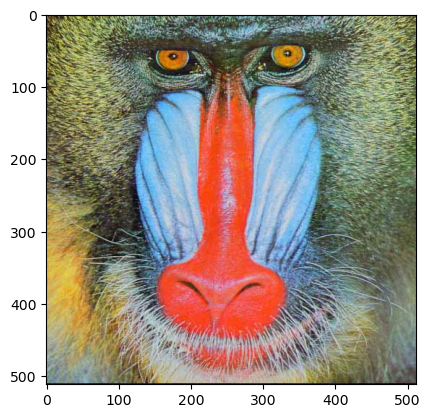

In [88]:
from skimage import io
obraz = io.imread('baboon.jpg')
# parametry macierzy obrazu - obraz kolorowy
print(obraz.shape, type(obraz))
plt.imshow(obraz)
# obraz2 = cv2.imread('baboon.jpg',0)
# parametry macierzy obra zu - obraz w skali szarości
# print(obraz2.shape, type(obraz2))

Wykorzystując funkcję `imread` możliwy jest także import obrazu z sieci, przez podanie jego adresu url. 

In [16]:
from skimage import io
url = "http://www.ee.pw.edu.pl/wp-content/uploads/2016/11/WE-znak.png"
obraz_www = io.imread(url)
print(obraz_www.shape, type(obraz_www))
plt.imshow(obraz_www) 

(124, 365, 4) <class 'numpy.ndarray'>


Dostęp do pikseli obrazu.

In [90]:
px = 100
py = 100
piks1 = obraz[px,py]
piks1g = obraz[px,py,1]
piks2 = obraz[px,py]
print("obraz(",px,",",py,")=",piks1)
print("obraz(",px,",",py,",1)=",piks1g)
print("obraz(",px,",",py,")=",piks2)

obraz( 100 , 100 )= [120 134 111]
obraz( 100 , 100 ,1)= 134
obraz( 100 , 100 )= [120 134 111]


Zmiana wartości pikseli

In [91]:
# pojedyncza składowa
print("przed: ",obraz[px,py])
obraz[px,py,2]=1
print("po zmianie jednej składowej: ",obraz[px,py])
# cały piksel
obraz[px,py]= [10,20,30]
print("po zmianie całego piksela: ",obraz[px,py])

przed:  [120 134 111]
po zmianie jednej składowej:  [120 134   1]
po zmianie całego piksela:  [10 20 30]


Wycinanie fragmentu obrazu (ROI = Region Of Interests) wymaga odwołania poprzez zakres współrzędnych.

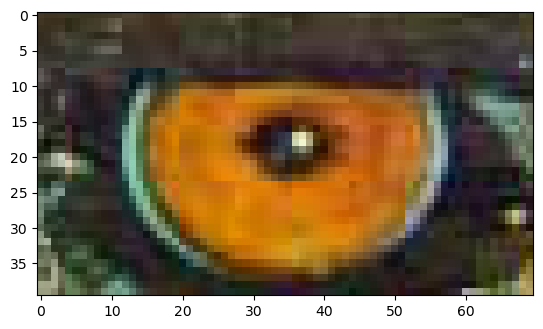

In [92]:
oko = obraz[40:80,140:210]
plt.imshow(oko)

## 4.2 Przestrzenie kolorów

Obraz kolorowy składa się z trzech składowych. W modelu RGB składowe te określają intensywność trzech barw podstawowych czerwonej, zielonej i niebieskiej. Aby otrzymać poszczególne składowe, obraz kolorowy należy zdekomponować na trzy obrazy w skali szarości. Możliwa jest także operacja odwrotna - z trzech obrazów składowych koloru tworzony jest jeden obraz kolorowy.

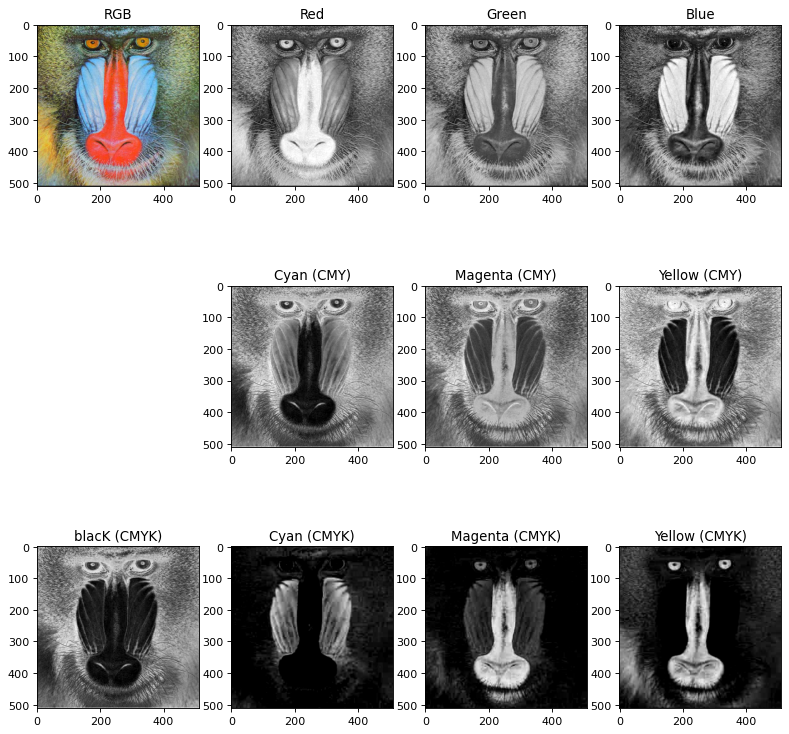

In [93]:
obraz = io.imread('baboon.jpg')
plt.figure(figsize=(12,12), dpi= 80)
ax = plt.subplot(3,4,1)   
ax.set_title("RGB")
plt.imshow(obraz)
ax = plt.subplot(3,4,2)
ax.set_title("Red")
plt.imshow(obraz[:,:,0],cmap='gray')
ax = plt.subplot(3,4,3)
ax.set_title("Green")
plt.imshow(obraz[:,:,1],cmap='gray')
ax = plt.subplot(3,4,4)
ax.set_title("Blue")
plt.imshow(obraz[:,:,2],cmap='gray')
# wyznaczamy składowe CMY
cmy_c = 255 - obraz[:,:,0]
cmy_m = 255 - obraz[:,:,1]
cmy_y = 255 - obraz[:,:,2] 
ax = plt.subplot(3,4,6)
ax.set_title("Cyan (CMY)")
plt.imshow(cmy_c,cmap='gray')
ax = plt.subplot(3,4,7)
ax.set_title("Magenta (CMY)")
plt.imshow(cmy_m,cmap='gray')
ax = plt.subplot(3,4,8)
ax.set_title("Yellow (CMY)")
plt.imshow(cmy_y,cmap='gray')
# wyznaczamy składowe CMYK
cmyk_k = np.minimum(cmy_c,np.minimum(cmy_m,cmy_y))
cmyk_c = cmy_c - cmyk_k
cmyk_m = cmy_m - cmyk_k
cmyk_y = cmy_y - cmyk_k
ax = plt.subplot(3,4,9)
ax.set_title("blacK (CMYK)")
plt.imshow(cmyk_k,cmap='gray')
ax = plt.subplot(3,4,10)
ax.set_title("Cyan (CMYK)")
plt.imshow(cmyk_c,cmap='gray')
ax = plt.subplot(3,4,11)
ax.set_title("Magenta (CMYK)")
plt.imshow(cmyk_m,cmap='gray')
ax = plt.subplot(3,4,12)
ax.set_title("Yellow (CMYK)")
plt.imshow(cmyk_y,cmap='gray')

Inny sposób wyświetlania - jako pojedyncza macierz, sklejona z trzech. Obraz kolorowy może być reprentowany a także przetwarzany w innych przestrzeniach kolorów. Poniższe przykłady przedstawiają separację barwną (rozbicie na składowe koloru) na trzy składowe przestrzeni RGB, YUV oraz HSV. Przykład pokazuje przy okazji inny sposób wyświetlania składowych obrazów kolorowych.

In [94]:
cmy_c = 255 - obraz[:,:,0]
cmy_m = 255 - obraz[:,:,1]
cmy_k = 255 - obraz[:,:,2] 

cmyk_k = 255 - np.maximum(obraz[:,:,0],obraz[:,:,1],obraz[:,:,1])
cmyk_c = cmy_c - cmyk_k
cmyk_m = cmy_m - cmyk_k
cmyk_k = cmy_k - cmyk_k

Text(0.5, 1.0, 'przestrzeń HSV')

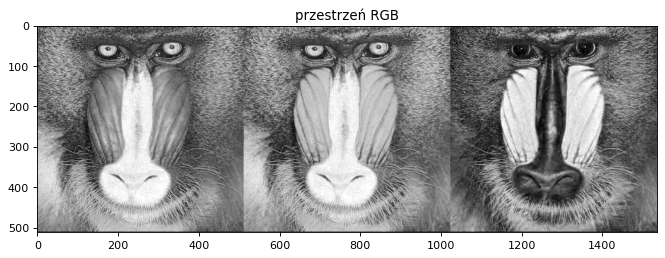

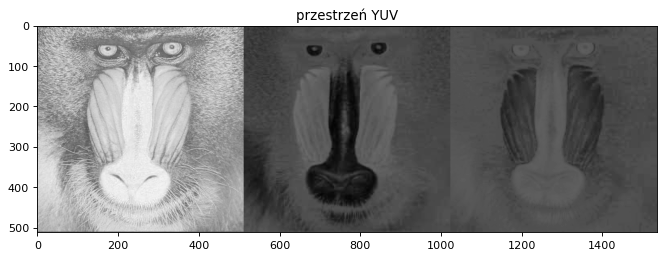

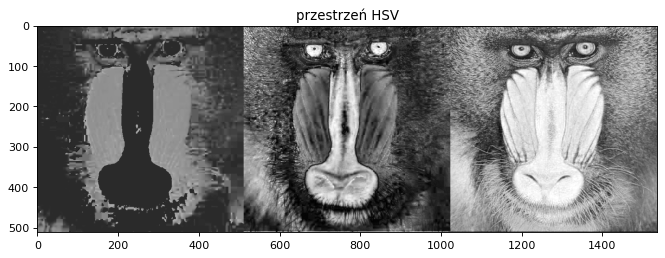

In [95]:
from skimage.color import rgb2hsv,rgb2yuv
plt.figure(figsize=(10,5),dpi = 80)
plt.imshow(np.hstack((obraz[:,:,0],obraz[:,:,1],obraz[:,:,2])),cmap='gray')
plt.title('przestrzeń RGB')
obraz_yuv = rgb2yuv(obraz)
plt.figure(figsize=(10,5),dpi = 80)
plt.imshow(np.hstack((obraz_yuv[:,:,0],obraz_yuv[:,:,1],obraz_yuv[:,:,2])),cmap='gray')
plt.title('przestrzeń YUV')
obraz_hsv = rgb2hsv(obraz)
plt.figure(figsize=(10,5),dpi = 80)
plt.imshow(np.hstack((obraz_hsv[:,:,0],obraz_hsv[:,:,1],obraz_hsv[:,:,2])),cmap='gray')
plt.title('przestrzeń HSV')

> **Zadanie** Wykonaj separacje barwne dla różnych przestrzeni docelowych dla dowolnego innego obrazu kolorowego, zwróć uwagę jak, w poszczególnych przestrzeniach, wyglądają obszar o określonych kolorach.

## Dla dociekliwych

* [Inny tutorial Pandasa](https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/) 
* [I jeszcze jeden](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
* [Serie danych](https://www.geeksforgeeks.org/python-pandas-series/)
* [Serie danych 2](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
* [Szeregi czasowe](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
* [Szeregi czasowe 2](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
* [Python+OpenCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)

---
---
Historia zmian:
* wersja pierwotna r.akad 18/19: 24.03.2019 (MI)
* wersja r.akad 19/20: 18.03.2020 (MI)
* wersja r.akad 19/20: 21.03.2020 (GS)
* wersja r.akad 20/21: 22.10.2020 (MI)
* wersja r.akad 24/25: 9.10.2024 (MI)
